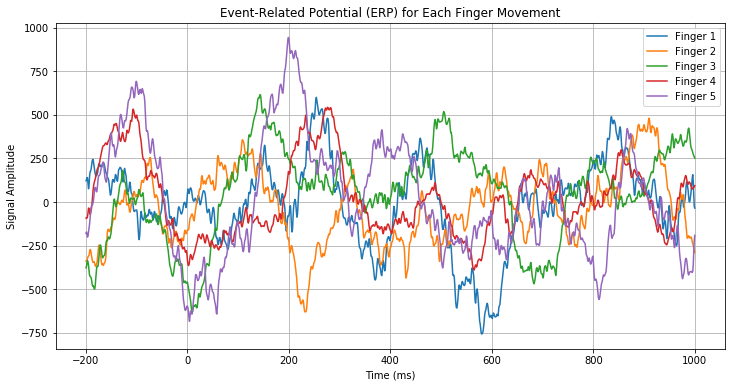


Event-Related Potential (ERP) Mean Matrix:


,0,1,2,3,4,5,6,7,8,9,...,1191,1192,1193,1194,1195,1196,1197,1198,1199,1200
Finger 1,121.585938,128.078125,140.179688,135.187500,101.851562,75.820312,97.250000,147.015625,173.390625,176.007812,...,14.507812,38.531250,65.179688,95.734375,136.234375,156.531250,120.414062,42.812500,-23.765625,-34.859375
Finger 2,-337.725000,-338.283333,-334.625000,-323.558333,-313.175000,-309.916667,-304.900000,-288.475000,-272.091667,-274.891667,...,-206.058333,-201.683333,-200.783333,-210.908333,-227.050000,-236.250000,-246.375000,-263.216667,-278.083333,-289.500000
Finger 3,-377.333333,-367.991667,-346.641667,-336.325000,-344.958333,-365.325000,-396.366667,-421.033333,-426.291667,-428.466667,...,348.725000,325.716667,309.966667,302.316667,295.416667,284.133333,273.916667,265.883333,258.375000,251.183333
Finger 4,-92.447368,-89.542105,-91.615789,-84.073684,-58.947368,-34.610526,-37.057895,-58.847368,-71.147368,-65.352632,...,106.505263,98.752632,87.463158,74.931579,74.200000,79.394737,79.300000,81.105263,87.200000,93.636842
Finger 5,-180.351351,-171.594595,-185.486486,-201.135135,-192.472973,-170.932432,-151.108108,-126.689189,-96.783784,-61.797297,...,-399.918919,-399.878378,-397.675676,-399.310811,-404.148649,-400.108108,-364.783784,-294.054054,-222.864865,-191.216216


In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate the mean Event-Related Potential (ERP) for each finger movement
def calc_mean_erp(trial_points_file, ecog_data_file):
    """
    Process trial event data and ECoG signal data to compute the mean ERP for each finger movement.

    Parameters:
    - trial_points_file (str): Path to the CSV file containing trial start times, peak times, and finger IDs.
    - ecog_data_file (str): Path to the CSV file containing ECoG brain signal data.

    Returns:
    - pd.DataFrame: A 5x1201 matrix where each row corresponds to a finger's average ERP.
    """

    # Load trial points data
    trial_data = pd.read_csv(trial_points_file, header=None, names=['start', 'peak', 'finger'])
    
    # Ensure the data types are correct (integers)
    trial_data = trial_data.astype({'start': int, 'peak': int, 'finger': int})

    # Load ECoG data as a NumPy array
    ecog_data = pd.read_csv(ecog_data_file, header=None).to_numpy(dtype=np.float64).flatten()

    # Time window settings
    pre_event = 200  # 200 ms before movement
    post_event = 1000  # 1000 ms after movement
    total_samples = pre_event + post_event + 1  # Total of 1201 samples per trial

    # Dictionary to store ERP segments for each finger
    erp_segments = {finger: [] for finger in range(1, 6)}

    # Extract and store signal segments for each finger
    for _, row in trial_data.iterrows():
        start_idx = row['start']
        finger = row['finger']

        # Ensure the indices are within bounds
        if start_idx - pre_event >= 0 and start_idx + post_event < len(ecog_data):
            segment = ecog_data[start_idx - pre_event : start_idx + post_event + 1]
            erp_segments[finger].append(segment)

    # Compute the mean ERP per finger
    erp_matrix = np.zeros((5, total_samples), dtype=np.float64)

    for finger in range(1, 6):
        if erp_segments[finger]:
            erp_matrix[finger - 1, :] = np.mean(np.array(erp_segments[finger]), axis=0)

    # Convert to DataFrame for better visualization
    erp_df = pd.DataFrame(erp_matrix, index=[f"Finger {i}" for i in range(1, 6)])

    # Plot results
    plot_erp(erp_df, pre_event, post_event)

    return erp_df


def plot_erp(erp_df, pre_event, post_event):
    """
    Plot the averaged Event-Related Potential (ERP) for each finger movement.

    Parameters:
    - erp_df (pd.DataFrame): DataFrame containing ERP data (5x1201).
    - pre_event (int): Time in ms before the event.
    - post_event (int): Time in ms after the event.
    """
    time_vector = np.linspace(-pre_event, post_event, erp_df.shape[1])

    plt.figure(figsize=(12, 6))
    
    # Iterate through each finger and plot its ERP
    for i, row in enumerate(erp_df.index):
        plt.plot(time_vector, erp_df.iloc[i], label=row)

    # Chart formatting
    plt.xlabel('Time (ms)')
    plt.ylabel('Signal Amplitude')
    plt.title('Event-Related Potential (ERP) for Each Finger Movement')
    plt.legend()
    plt.grid(True)
    plt.show()


# File paths (ensure files are in the same directory as the Jupyter notebook)
trial_points_file = "events_file_ordered.csv"
ecog_data_file = "brain_data_channel_one.csv"

# Execute ERP calculation and visualization
erp_results = calc_mean_erp(trial_points_file, ecog_data_file)

# Display the computed ERP matrix as a DataFrame
print("\nEvent-Related Potential (ERP) Mean Matrix:")
display(erp_results)  # Use Jupyter's display function

